In [13]:
import pandas as pd
import numpy as np
import datetime
from collections import Counter
from sklearn.preprocessing import MinMaxScaler
# @github https://github.com/LKI/chinese-calendar
from chinese_calendar import is_workday
import matplotlib as mpl
import matplotlib.pyplot as plt
# notebook嵌入图片
%matplotlib inline
# 提高分辨率
%config InlineBackend.figure_format='retina'
from matplotlib.font_manager import FontProperties
font = FontProperties(fname="/root/miniconda3/lib/python3.12/site-packages/matplotlib/mpl-data/fonts/ttf/SimHei.ttf")
import warnings
warnings.filterwarnings('ignore')

In [14]:
def isWork(date: list):
    """判断是否工作"""
    return is_workday(datetime.date(date[0], date[1], date[2]))

In [15]:
canteen=pd.read_csv('data/task1_2_1.csv',encoding='gbk')
canteen['Datetime'] = pd.to_datetime(canteen['Date'] + ' ' + canteen['Time'])  
# canteen['Date']
canteen['Date'] = pd.to_datetime(canteen['Date'])  
# print("Data type after conversion:", canteen['Date'].dtype)  
# 判断就餐时间和年份为
canteen['Year'] = canteen['Date'].dt.year  
canteen['Month'] = canteen['Date'].dt.month  
unique_year_months = canteen[['Year', 'Month']].drop_duplicates()  
unique_year_months

,Year,Month
0,2019,4


In [16]:
# 针对2019年4月生成工作日or非工作日
counter = Counter(list(map(isWork, [[2019, 4, i] for i in range(1, 31)])))
counter

Counter({True: 22, False: 8})

In [17]:
# 添加字段isWork
canteen['isWork'] = canteen['Date'].apply(lambda date: isWork([date.year, date.month, date.day]))  
canteen

,Index,CardNo,Sex,Major,AccessCardNo,Date,Money,FundMoney,Surplus,CardCount,Type,TermNo,OperNo,Dept,Time,Datetime,Year,Month,isWork
0,1,180001,男,18国际金融,19762330,2019-04-21,7.0,0.0,28.4,206.0,消费,41.0,249.0,第四食堂,18:30,2019-04-21 18:30:00,2019,4,False
1,1,180001,男,18国际金融,19762330,2019-04-22,3.5,0.0,24.9,207.0,消费,19.0,236.0,第一食堂,09:40,2019-04-22 09:40:00,2019,4,True
2,1,180001,男,18国际金融,19762330,2019-04-10,11.0,0.0,2.7,189.0,消费,82.0,18.0,第四食堂,16:42,2019-04-10 16:42:00,2019,4,True
3,1,180001,男,18国际金融,19762330,2019-04-15,7.0,0.0,43.2,192.0,消费,62.0,2.0,第四食堂,11:43,2019-04-15 11:43:00,2019,4,True
4,1,180001,男,18国际金融,19762330,2019-04-15,2.5,0.0,50.2,191.0,消费,2.0,236.0,第一食堂,07:50,2019-04-15 07:50:00,2019,4,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241074,4339,184339,女,18工业工程,11513762,2019-04-18,2.5,0.0,78.8,551.0,消费,118.0,204.0,第五食堂,18:13,2019-04-18 18:13:00,2019,4,True
241075,4339,184339,女,18工业工程,11513762,2019-04-15,4.1,0.0,46.5,526.0,消费,114.0,8.0,第五食堂,07:26,2019-04-15 07:26:00,2019,4,True
241076,4339,184339,女,18工业工程,11513762,2019-04-15,0.6,0.0,45.9,527.0,消费,127.0,204.0,第五食堂,07:27,2019-04-15 07:27:00,2019,4,True
241077,4339,184339,女,18工业工程,11513762,2019-04-15,6.0,0.0,39.9,528.0,消费,132.0,204.0,第五食堂,13:14,2019-04-15 13:14:00,2019,4,True


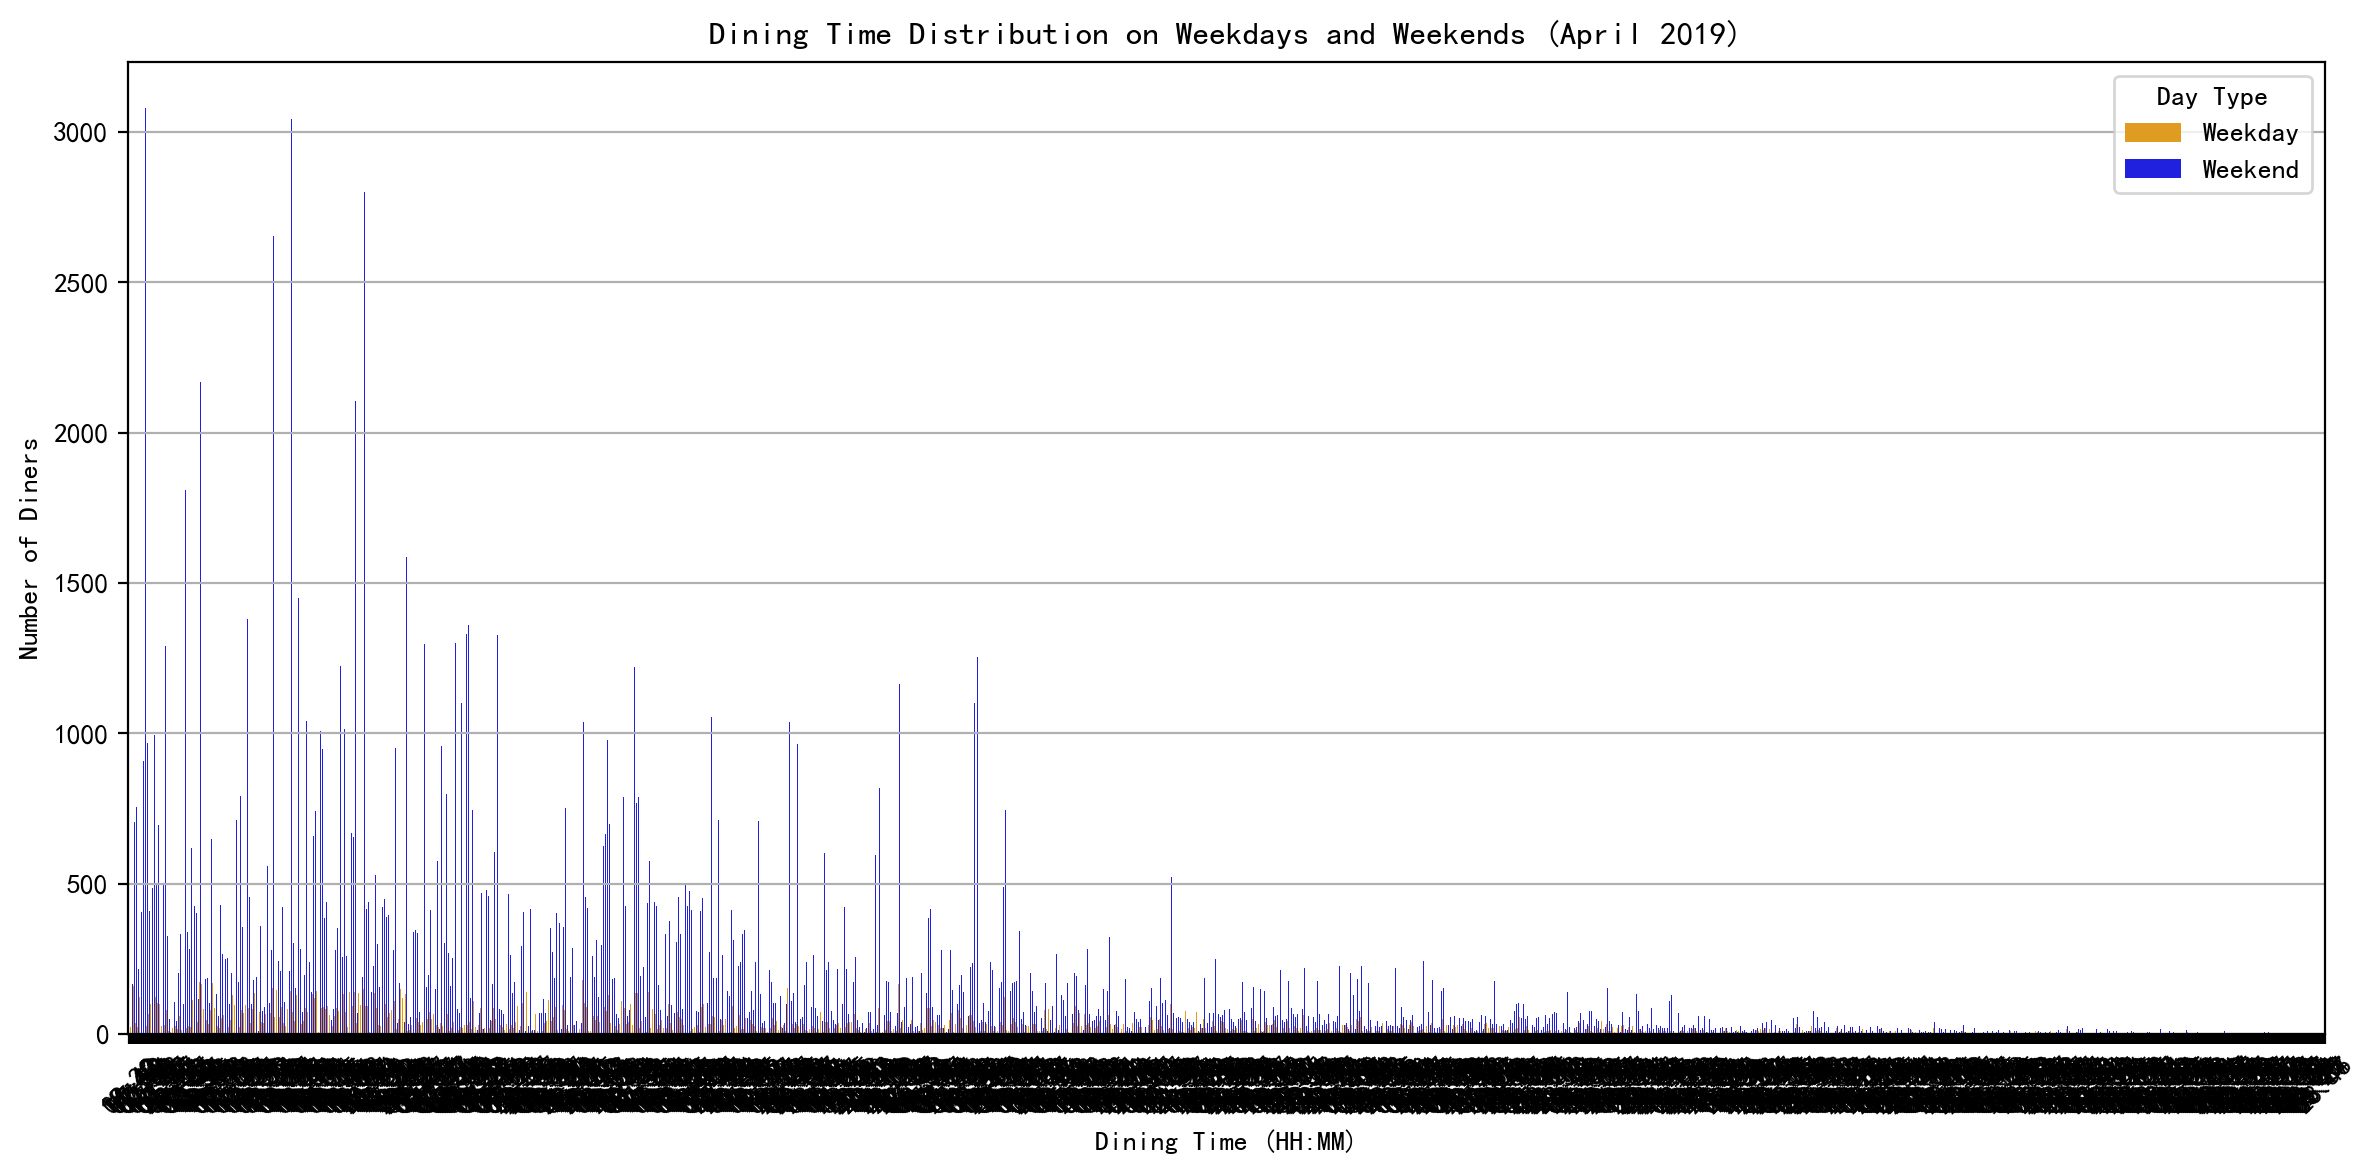

In [19]:
canteen['Time'] = pd.to_datetime(canteen['Time'], format='%H:%M').dt.strftime('%H:%M')  

# 绘制工作日和非工作日的就餐时间峰值图  
plt.figure(figsize=(12, 6))  
import seaborn as sns
# 使用 Seaborn 的 countplot 绘制  
sns.countplot(data=canteen, x='Time', hue='isWork', palette={np.True_: 'blue', np.False_: 'orange'})  

# 添加图例和标签  
plt.title('Dining Time Distribution on Weekdays and Weekends (April 2019)')  
plt.xlabel('Dining Time (HH:MM)')  
plt.ylabel('Number of Diners')  
plt.xticks(rotation=45)  # 旋转 x 轴标签以便更好地显示  
plt.grid(axis='y')  
plt.legend(title='Day Type', labels=['Weekday', 'Weekend'])  
plt.tight_layout()  # 自动调整布局  
plt.show()  